#### 1. Compared to FNN, what is the biggest advantage of CNN?

Ans:  

1. CNN can extract the local features so that it reduce the number of parameters and reduce the overfitting problem.
2. Extracting local features can help model to focus on the more important features in the global inputs, which have a better application in image processing. 

#### 2. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

Ans:    
 
50 filter means there has 50 feature maps.    
Because of parameter sharing, each feature map shares $5 \cdot 5 = 25$ parameters.   
Therefore, there has $50\cdot25 = 1250$ weights, plus $50$ bias equal to $1300$ parameters.





#### 3. What are "local invariant" and "parameter sharing" ?

Ans:   
    After convolution computing, the parameters in the raw input are included in the convoluted output. Every output in the convoluted output contains all information in a local region which called receptive field. All inputs in a receptive field have same parameter.  
    

#### 4. Why we use batch normalization ?

Ans:   
In neural network training, especially for networks that use non-linear activation function, there may happen gradient vanishing and gradient explode. Gradient vanishing will slow the training and gradient explode will cause the training uncontrol. Batch normalization normalize the input of the activation function to avoid the problem.


#### 5. What problem does dropout try to solve ?

Ans:   

Dropout is trying to solve overfitting problem


#### 6.  Is the following statement correct and why ? "Because pooling layers do not have parameters, they do not affect  the backpropagation(derivatives) calculation"

Ans:   

No, Pooling layer changes the size of feature map so that changes the number of gradients. 

### 实践题

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt

Load the dataset. 

In [12]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

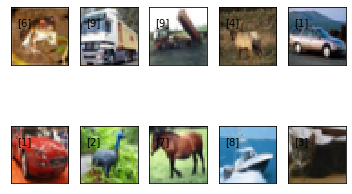

In [13]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1])
    plt.text(3,10,str(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [23]:
x_train, x_test = x_train/255.0, x_test/255.0

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, MaxPool2D, Flatten

In [33]:
inputs = Input(shape=(32,32,3),name="inputs")

conv_1 = Conv2D(32,3,activation='relu')(inputs)  #30*30
pool_1 = MaxPool2D(pool_size=(2,2))(conv_1) #15*15

conv_2 = Conv2D(64,3,activation='relu')(pool_1) #13*13
pool_2 = MaxPool2D(pool_size=(2,2))(conv_2) #6*6

conv_3 = Conv2D(64,3,activation='relu')(pool_2) #4*4  
# pool_3 = MaxPool2D(pool_size=(2,2))(conv_3) 

# fc_1 = Dense(18,activation='relu',)(pool_2)

# fc_2 = Dense()(fc_1)

flatten = Flatten()(conv_3)

dense_1 = Dense(64, activation='relu')(flatten)

outputs = Dense(10, activation='softmax')(dense_1)

model = Model(inputs=inputs, outputs=outputs)




In [34]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0   

In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])

In [36]:
model.fit(x_train, y_train, batch_size=256, epochs=50, shuffle=True, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 162us/sample - loss: 1.7531 - acc: 0.3580 - val_loss: 1.4825 - val_acc: 0.4512
Epoch 2/50
50000/50000 [==============================] - 7s 150us/sample - loss: 1.3903 - acc: 0.4997 - val_loss: 1.3260 - val_acc: 0.5287
Epoch 3/50
50000/50000 [==============================] - 8s 150us/sample - loss: 1.2647 - acc: 0.5498 - val_loss: 1.2361 - val_acc: 0.5652
Epoch 4/50
50000/50000 [==============================] - 8s 152us/sample - loss: 1.1702 - acc: 0.5881 - val_loss: 1.1832 - val_acc: 0.5807
Epoch 5/50
50000/50000 [==============================] - 8s 154us/sample - loss: 1.0945 - acc: 0.6157 - val_loss: 1.0729 - val_acc: 0.6219
Epoch 6/50
50000/50000 [==============================] - 8s 155us/sample - loss: 1.0349 - acc: 0.6392 - val_loss: 1.0455 - val_acc: 0.6339
Epoch 7/50
50000/50000 [==============================] - 8s 158us/sample - loss: 0.9845 - acc: 0.6598 - val_l

In [50]:
pred = model.predict(x_test)

In [60]:
for i,l in zip(pred, y_test):
    print("prediction: {0},  probability: {1}, truth label: {2}".format(list(i).index(i.max()),round(float(i.max()),2),l))

prediction: 3,  probability: 0.99, truth label: [3]
prediction: 8,  probability: 1.0, truth label: [8]
prediction: 0,  probability: 0.76, truth label: [8]
prediction: 0,  probability: 0.99, truth label: [0]
prediction: 6,  probability: 0.84, truth label: [6]
prediction: 6,  probability: 0.97, truth label: [6]
prediction: 1,  probability: 0.76, truth label: [1]
prediction: 6,  probability: 0.93, truth label: [6]
prediction: 3,  probability: 0.99, truth label: [3]
prediction: 1,  probability: 1.0, truth label: [1]
prediction: 4,  probability: 0.91, truth label: [0]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 3,  probability: 0.69, truth label: [5]
prediction: 7,  probability: 1.0, truth label: [7]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 8,  probability: 0.84, truth label: [8]
prediction: 5,  probability: 1.0, truth label: [5]
prediction: 9,  probability: 0.71, truth label: [7]
prediction: 8,  probability: 1.0, truth label: [8]
prediction: 6,  pro

prediction: 6,  probability: 0.61, truth label: [4]
prediction: 7,  probability: 0.96, truth label: [7]
prediction: 4,  probability: 0.46, truth label: [7]
prediction: 3,  probability: 0.87, truth label: [5]
prediction: 3,  probability: 0.78, truth label: [3]
prediction: 7,  probability: 0.97, truth label: [7]
prediction: 2,  probability: 0.99, truth label: [2]
prediction: 0,  probability: 0.94, truth label: [0]
prediction: 8,  probability: 1.0, truth label: [8]
prediction: 9,  probability: 0.89, truth label: [9]
prediction: 3,  probability: 0.88, truth label: [5]
prediction: 1,  probability: 0.47, truth label: [8]
prediction: 3,  probability: 0.97, truth label: [3]
prediction: 2,  probability: 0.54, truth label: [6]
prediction: 2,  probability: 1.0, truth label: [2]
prediction: 0,  probability: 1.0, truth label: [0]
prediction: 8,  probability: 1.0, truth label: [8]
prediction: 7,  probability: 1.0, truth label: [7]
prediction: 2,  probability: 0.99, truth label: [3]
prediction: 0,  p

prediction: 0,  probability: 0.82, truth label: [2]
prediction: 3,  probability: 1.0, truth label: [5]
prediction: 9,  probability: 0.86, truth label: [1]
prediction: 6,  probability: 1.0, truth label: [6]
prediction: 4,  probability: 0.98, truth label: [4]
prediction: 3,  probability: 0.9, truth label: [3]
prediction: 4,  probability: 0.99, truth label: [4]
prediction: 4,  probability: 0.83, truth label: [4]
prediction: 0,  probability: 0.92, truth label: [0]
prediction: 8,  probability: 1.0, truth label: [8]
prediction: 8,  probability: 1.0, truth label: [8]
prediction: 4,  probability: 0.99, truth label: [4]
prediction: 5,  probability: 0.97, truth label: [5]
prediction: 7,  probability: 1.0, truth label: [7]
prediction: 5,  probability: 0.98, truth label: [5]
prediction: 6,  probability: 1.0, truth label: [6]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 1,  probability: 1.0, truth label: [1]
prediction: 6,  probability: 1.0, truth label: [6]
prediction: 7,  probab

prediction: 1,  probability: 0.91, truth label: [1]
prediction: 2,  probability: 0.74, truth label: [2]
prediction: 5,  probability: 0.86, truth label: [5]
prediction: 9,  probability: 0.75, truth label: [1]
prediction: 6,  probability: 0.99, truth label: [6]
prediction: 7,  probability: 0.77, truth label: [7]
prediction: 1,  probability: 0.96, truth label: [1]
prediction: 3,  probability: 0.92, truth label: [5]
prediction: 8,  probability: 1.0, truth label: [8]
prediction: 8,  probability: 1.0, truth label: [8]
prediction: 0,  probability: 1.0, truth label: [0]
prediction: 3,  probability: 0.69, truth label: [3]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 4,  probability: 0.76, truth label: [4]
prediction: 0,  probability: 0.9, truth label: [0]
prediction: 6,  probability: 1.0, truth label: [3]
prediction: 4,  probability: 0.93, truth label: [4]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 2,  probability: 0.47, truth label: [2]
prediction: 4,  pro

prediction: 2,  probability: 0.7, truth label: [4]
prediction: 7,  probability: 1.0, truth label: [7]
prediction: 3,  probability: 0.44, truth label: [9]
prediction: 0,  probability: 0.97, truth label: [0]
prediction: 9,  probability: 0.68, truth label: [3]
prediction: 5,  probability: 0.98, truth label: [5]
prediction: 4,  probability: 1.0, truth label: [4]
prediction: 7,  probability: 1.0, truth label: [7]
prediction: 6,  probability: 1.0, truth label: [6]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 8,  probability: 0.45, truth label: [8]
prediction: 2,  probability: 0.66, truth label: [2]
prediction: 3,  probability: 1.0, truth label: [3]
prediction: 9,  probability: 0.99, truth label: [9]
prediction: 3,  probability: 0.79, truth label: [3]
prediction: 3,  probability: 0.89, truth label: [3]
prediction: 7,  probability: 0.88, truth label: [7]
prediction: 8,  probability: 1.0, truth label: [8]
prediction: 3,  probability: 1.0, truth label: [3]
prediction: 5,  proba

prediction: 3,  probability: 0.88, truth label: [6]
prediction: 5,  probability: 0.9, truth label: [5]
prediction: 1,  probability: 0.52, truth label: [9]
prediction: 3,  probability: 0.4, truth label: [7]
prediction: 8,  probability: 0.99, truth label: [8]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 6,  probability: 1.0, truth label: [6]
prediction: 3,  probability: 0.97, truth label: [4]
prediction: 8,  probability: 1.0, truth label: [8]
prediction: 1,  probability: 1.0, truth label: [1]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 4,  probability: 0.77, truth label: [4]
prediction: 0,  probability: 0.71, truth label: [0]
prediction: 3,  probability: 0.95, truth label: [4]
prediction: 1,  probability: 0.98, truth label: [1]
prediction: 4,  probability: 1.0, truth label: [4]
prediction: 3,  probability: 0.88, truth label: [3]
prediction: 6,  probability: 1.0, truth label: [6]
prediction: 2,  probability: 1.0, truth label: [2]
prediction: 2,  probab

prediction: 5,  probability: 0.54, truth label: [3]
prediction: 0,  probability: 0.99, truth label: [0]
prediction: 0,  probability: 0.93, truth label: [0]
prediction: 6,  probability: 1.0, truth label: [6]
prediction: 3,  probability: 0.54, truth label: [6]
prediction: 8,  probability: 0.98, truth label: [8]
prediction: 6,  probability: 1.0, truth label: [6]
prediction: 6,  probability: 1.0, truth label: [6]
prediction: 0,  probability: 0.99, truth label: [0]
prediction: 3,  probability: 1.0, truth label: [3]
prediction: 4,  probability: 1.0, truth label: [4]
prediction: 0,  probability: 0.48, truth label: [7]
prediction: 4,  probability: 0.71, truth label: [4]
prediction: 8,  probability: 0.72, truth label: [9]
prediction: 2,  probability: 0.93, truth label: [4]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 9,  probability: 0.8, truth label: [9]
prediction: 3,  probability: 0.92, truth label: [3]
prediction: 4,  probability: 0.94, truth label: [4]
prediction: 1,  pro

prediction: 0,  probability: 1.0, truth label: [0]
prediction: 6,  probability: 0.98, truth label: [6]
prediction: 2,  probability: 0.55, truth label: [2]
prediction: 3,  probability: 1.0, truth label: [3]
prediction: 2,  probability: 0.94, truth label: [2]
prediction: 1,  probability: 1.0, truth label: [1]
prediction: 2,  probability: 0.98, truth label: [7]
prediction: 9,  probability: 0.62, truth label: [5]
prediction: 1,  probability: 1.0, truth label: [1]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 8,  probability: 1.0, truth label: [8]
prediction: 3,  probability: 0.85, truth label: [3]
prediction: 3,  probability: 0.55, truth label: [6]
prediction: 3,  probability: 0.6, truth label: [9]
prediction: 5,  probability: 0.98, truth label: [7]
prediction: 5,  probability: 0.6, truth label: [3]
prediction: 0,  probability: 1.0, truth label: [0]
prediction: 2,  probability: 0.97, truth label: [2]
prediction: 3,  probability: 0.84, truth label: [3]
prediction: 9,  proba

prediction: 7,  probability: 1.0, truth label: [7]
prediction: 1,  probability: 1.0, truth label: [1]
prediction: 6,  probability: 0.5, truth label: [7]
prediction: 6,  probability: 1.0, truth label: [6]
prediction: 4,  probability: 0.83, truth label: [4]
prediction: 5,  probability: 0.89, truth label: [4]
prediction: 0,  probability: 0.62, truth label: [8]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 9,  probability: 0.75, truth label: [0]
prediction: 3,  probability: 0.33, truth label: [7]
prediction: 1,  probability: 1.0, truth label: [1]
prediction: 2,  probability: 1.0, truth label: [2]
prediction: 2,  probability: 0.99, truth label: [4]
prediction: 0,  probability: 0.89, truth label: [0]
prediction: 3,  probability: 0.62, truth label: [3]
prediction: 2,  probability: 0.57, truth label: [7]
prediction: 6,  probability: 0.47, truth label: [5]
prediction: 1,  probability: 0.96, truth label: [1]
prediction: 3,  probability: 0.84, truth label: [9]
prediction: 7,  pro

prediction: 7,  probability: 0.96, truth label: [7]
prediction: 6,  probability: 1.0, truth label: [6]
prediction: 6,  probability: 0.99, truth label: [6]
prediction: 0,  probability: 0.85, truth label: [7]
prediction: 2,  probability: 0.82, truth label: [5]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 8,  probability: 1.0, truth label: [8]
prediction: 5,  probability: 0.99, truth label: [7]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 5,  probability: 0.99, truth label: [5]
prediction: 6,  probability: 0.66, truth label: [6]
prediction: 0,  probability: 0.68, truth label: [0]
prediction: 4,  probability: 1.0, truth label: [4]
prediction: 8,  probability: 0.58, truth label: [8]
prediction: 3,  probability: 0.54, truth label: [2]
prediction: 3,  probability: 0.38, truth label: [0]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 1,  probability: 0.6, truth label: [1]
prediction: 3,  probability: 0.92, truth label: [3]
prediction: 9,  pro

prediction: 6,  probability: 0.69, truth label: [6]
prediction: 8,  probability: 1.0, truth label: [8]
prediction: 6,  probability: 1.0, truth label: [4]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 8,  probability: 1.0, truth label: [8]
prediction: 7,  probability: 1.0, truth label: [4]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 3,  probability: 0.91, truth label: [2]
prediction: 3,  probability: 0.99, truth label: [3]
prediction: 4,  probability: 0.9, truth label: [4]
prediction: 0,  probability: 1.0, truth label: [0]
prediction: 5,  probability: 0.41, truth label: [2]
prediction: 3,  probability: 0.7, truth label: [5]
prediction: 6,  probability: 1.0, truth label: [6]
prediction: 6,  probability: 0.99, truth label: [0]
prediction: 2,  probability: 0.68, truth label: [5]
prediction: 1,  probability: 0.99, truth label: [3]
prediction: 6,  probability: 0.92, truth label: [5]
prediction: 8,  probability: 1.0, truth label: [8]
prediction: 5,  probabi

prediction: 2,  probability: 0.7, truth label: [3]
prediction: 8,  probability: 0.8, truth label: [8]
prediction: 6,  probability: 1.0, truth label: [6]
prediction: 9,  probability: 0.82, truth label: [8]
prediction: 9,  probability: 0.92, truth label: [1]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 4,  probability: 0.95, truth label: [6]
prediction: 7,  probability: 1.0, truth label: [7]
prediction: 6,  probability: 1.0, truth label: [6]
prediction: 5,  probability: 0.59, truth label: [5]
prediction: 0,  probability: 0.76, truth label: [0]
prediction: 6,  probability: 1.0, truth label: [6]
prediction: 0,  probability: 1.0, truth label: [0]
prediction: 1,  probability: 1.0, truth label: [1]
prediction: 3,  probability: 1.0, truth label: [3]
prediction: 9,  probability: 0.58, truth label: [1]
prediction: 1,  probability: 0.99, truth label: [1]
prediction: 5,  probability: 0.45, truth label: [5]
prediction: 6,  probability: 1.0, truth label: [3]
prediction: 5,  probabi

prediction: 6,  probability: 1.0, truth label: [6]
prediction: 8,  probability: 1.0, truth label: [2]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 1,  probability: 1.0, truth label: [1]
prediction: 3,  probability: 0.41, truth label: [5]
prediction: 8,  probability: 0.95, truth label: [8]
prediction: 8,  probability: 0.97, truth label: [8]
prediction: 7,  probability: 1.0, truth label: [7]
prediction: 1,  probability: 0.84, truth label: [1]
prediction: 7,  probability: 0.96, truth label: [7]
prediction: 5,  probability: 1.0, truth label: [3]
prediction: 3,  probability: 0.45, truth label: [5]
prediction: 4,  probability: 0.54, truth label: [4]
prediction: 9,  probability: 0.99, truth label: [9]
prediction: 7,  probability: 1.0, truth label: [7]
prediction: 3,  probability: 1.0, truth label: [5]
prediction: 3,  probability: 0.47, truth label: [2]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 9,  probability: 1.0, truth label: [9]
prediction: 4,  probab